In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Stock Price Prediction/Stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-16,29.062500,29.135000,28.860001,29.102501,26.894033,148694000
1,2015-09-17,28.915001,29.122499,28.430000,28.480000,26.318771,256450400
2,2015-09-18,28.052500,28.575001,27.967501,28.362499,26.210186,297141200
3,2015-09-21,28.417500,28.842501,28.415001,28.802500,26.616798,200888000
4,2015-09-22,28.344999,28.545000,28.129999,28.350000,26.198639,201384800


In [37]:
df.set_index("Date", drop=True,inplace =True)

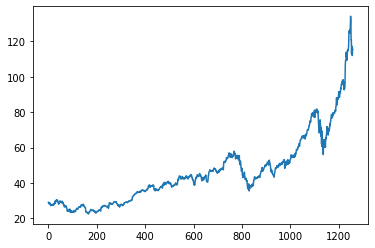

In [38]:
df1 = df.reset_index()[['Close']]
plt.plot(df1)

In [39]:
type(df1)
df=df1

In [40]:
df["returns"] = df.Close.pct_change()
df.head()
df["log_returns"]= np.log(1+df["returns"])

In [41]:
df.dropna(inplace=True)

In [42]:
X = df[["Close", "log_returns"]].values

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled =scaler.transform(X)
X_scaled[:10]

array([[0.05282496, 0.46274201],
       [0.05177204, 0.5324517 ],
       [0.05571487, 0.61029678],
       [0.05166003, 0.48580963],
       [0.05372106, 0.58114079],
       [0.05524442, 0.57257227],
       [0.05459475, 0.53886688],
       [0.04950941, 0.46925788],
       [0.04193737, 0.42726643],
       [0.04471529, 0.59399894]])

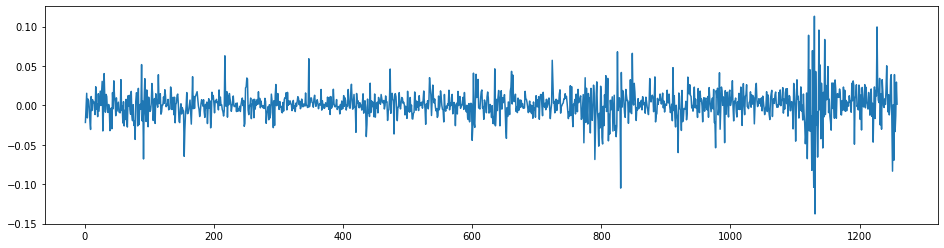

In [44]:
plt.figure(1, figsize= (16,4))
plt.plot(df.log_returns)

In [45]:
y = [X[0] for X in X_scaled]
y[:5]

[0.0528249591554259,
 0.05177203558073579,
 0.05571487373349382,
 0.051660032348762874,
 0.05372105669901284]

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_vali,y_train,y_vali = train_test_split(X_scaled,y, test_size=0.2)

In [47]:
X_valid = X_vali[:221,:]
y_valid = y_vali[:221]
X_test = X_vali[222:,:]
y_test = y_vali[222:]

In [48]:
n=10;
Xtrain=[]
Ytrain=[]
Xvalid=[]
Yvalid=[]
Xtest=[]
Ytest=[]

In [49]:
for i in range(n,len(X_train)):
    Xtrain.append(X_train[i-n : i, : X_train.shape[1]])
    Ytrain.append(y_train[i])
    
for i in range(n,len(X_test)):
    Xtest.append(X_test[i-n : i, : X_test.shape[1]])
    Ytest.append(y_test[i])
    
for i in range(n,len(X_valid)):
    Xvalid.append(X_valid[i-n : i, : X_valid.shape[1]])
    Yvalid.append(y_valid[i])

In [51]:
Xtrain, Ytrain = (np.array(Xtrain),np.array(Ytrain))
Xtrain= np.reshape(Xtrain, (Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2]))

In [52]:
Xtest,Ytest = (np.array(Xtest),np.array(Ytest))
Xtest= np.reshape(Xtest, (Xtest.shape[0],Xtest.shape[1],Xtest.shape[2]))

In [53]:
Xvalid,Yvalid = (np.array(Xvalid),np.array(Yvalid))
Xvalid= np.reshape(Xvalid, (Xvalid.shape[0],Xvalid.shape[1],Xvalid.shape[2]))

In [54]:
X_test.shape, X_train.shape, X_valid.shape

((30, 2), (1006, 2), (221, 2))

In [55]:
Xtrain.shape,Xtest.shape,Xvalid.shape

((996, 10, 2), (20, 10, 2), (211, 10, 2))

In [56]:
## LSTM mode
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [57]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,2)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model.fit(Xtrain,Ytrain,epochs= 30, validation_data=(Xvalid,Yvalid),batch_size= 20,verbose=1)

Epoch 1/30
50/50 [==============================] - 7s 41ms/step - loss: 0.0354 - val_loss: 0.0364
Epoch 2/30
50/50 [==============================] - 1s 17ms/step - loss: 0.0318 - val_loss: 0.0365
Epoch 3/30
50/50 [==============================] - 1s 18ms/step - loss: 0.0319 - val_loss: 0.0366
Epoch 4/30
50/50 [==============================] - 1s 18ms/step - loss: 0.0320 - val_loss: 0.0364
Epoch 5/30
50/50 [==============================] - 1s 18ms/step - loss: 0.0320 - val_loss: 0.0368
Epoch 6/30
50/50 [==============================] - 1s 18ms/step - loss: 0.0320 - val_loss: 0.0364
Epoch 7/30
50/50 [==============================] - 1s 17ms/step - loss: 0.0322 - val_loss: 0.0367
Epoch 8/30
50/50 [==============================] - 1s 17ms/step - loss: 0.0320 - val_loss: 0.0390
Epoch 9/30
50/50 [==============================] - 1s 17ms/step - loss: 0.0323 - val_loss: 0.0364
Epoch 10/30
50/50 [==============================] - 1s 17ms/step - loss: 0.0321 - val_loss: 0.0364
Epoch 11/

In [59]:
train_pred = model.predict(Xtrain)
test_pred =  model.predict(Xtest)
train_pred = np.c_[train_pred,np.zeros(train_pred.shape)]
test_pred = np.c_[test_pred,np.zeros(test_pred.shape)]

In [60]:
trainPredict = scaler.inverse_transform(train_pred)
trainpred = [x[0] for x in trainPredict]
testPredict = scaler.inverse_transform(test_pred)
testpred = [x[0] for x in testPredict]

In [61]:
print(testpred[:10])
print(testpred)

[47.771161681269085, 47.70363983003688, 47.51345785536075, 47.47795005855343, 47.3785372071259, 47.303181457576876, 47.356241111046074, 47.44611892257789, 47.67292117081234, 47.69860624688998]
[47.771161681269085, 47.70363983003688, 47.51345785536075, 47.47795005855343, 47.3785372071259, 47.303181457576876, 47.356241111046074, 47.44611892257789, 47.67292117081234, 47.69860624688998, 47.80982066409007, 48.00788309814286, 47.869782994679454, 47.796509189662935, 47.634375264850945, 47.4718405823454, 47.45774255858609, 47.54886421557343, 47.608139770530286, 47.74925969130284]


In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
print("Root mean Square error= ")
testScore = np.sqrt(mean_squared_error([x[0][0] for x in Xtest], testpred,squared=False))
testScore

Root mean Square error= 


6.887885952630875